In [1]:
import json

# JSON 파일 이름
input_file_name = 'date_filtered_goso_06_11.json'
output_file_name = '6-11월 4개 항공사.json'

# 추출할 회사 목록
target_companies = ["대한항공", "제주항공", "아시아나항공", "진에어"]

def filter_by_company(data):
    """
    JSON 데이터에서 company 값이 특정 회사 목록에 해당하는 항목만 추출.
    """
    if isinstance(data, dict):
        # "company" 키의 값을 확인
        if "company" in data and data["company"].strip().lower() in [c.lower() for c in target_companies]:
            return data  # 조건에 맞으면 반환
        # 중첩된 데이터 재귀 탐색
        return {key: filter_by_company(value) for key, value in data.items() if filter_by_company(value)}
    elif isinstance(data, list):
        # 리스트 항목 재귀 탐색
        return [filter_by_company(item) for item in data if filter_by_company(item)]
    return None  # 조건에 맞지 않는 경우 제거

try:
    # JSON 파일 읽기
    with open(input_file_name, 'r', encoding='utf-8') as file:
        data = json.load(file)

    # 데이터 필터링
    filtered_data = filter_by_company(data)

    # 필터링된 JSON 데이터 저장
    with open(output_file_name, 'w', encoding='utf-8') as file:
        json.dump(filtered_data, file, ensure_ascii=False, indent=4)

    print(f"필터링된 JSON 데이터가 '{output_file_name}' 파일에 저장되었습니다.")
except FileNotFoundError:
    print(f"파일 '{input_file_name}'을(를) 찾을 수 없습니다.")
except json.JSONDecodeError:
    print("JSON 파일 형식이 올바르지 않습니다.")

필터링된 JSON 데이터가 '6-11월 4개 항공사.json' 파일에 저장되었습니다.


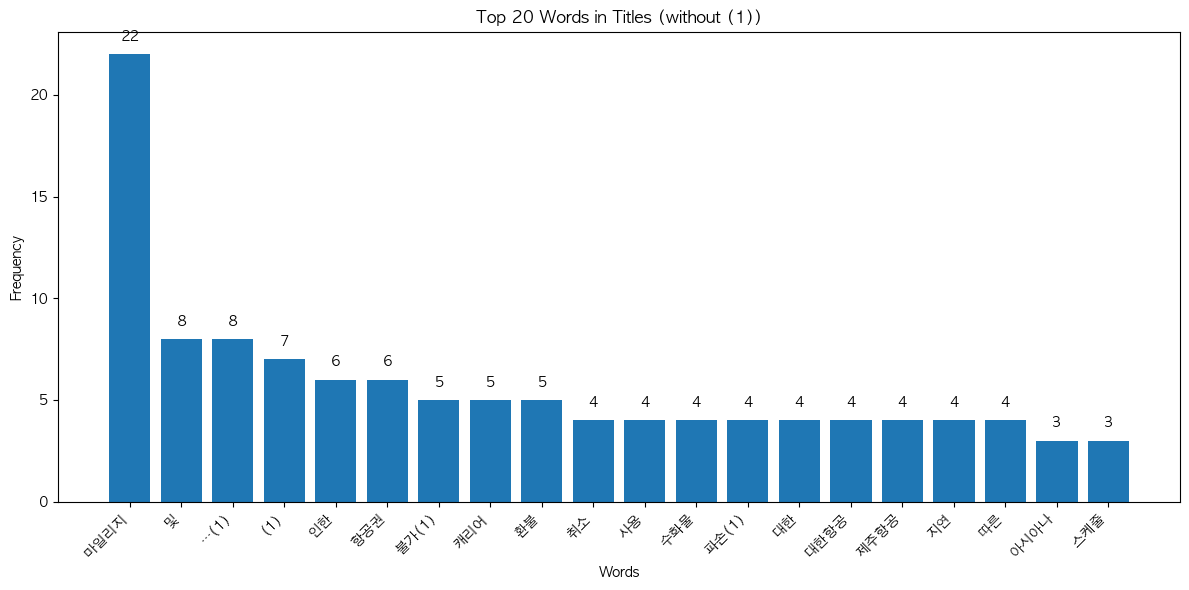

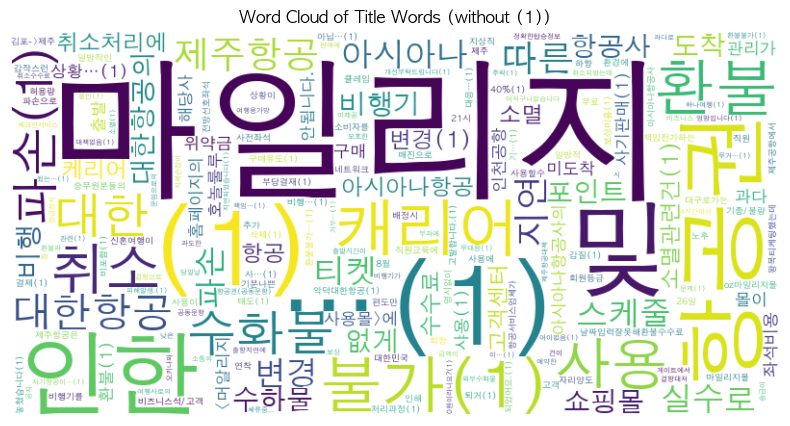

In [4]:
import json
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib import rc
from wordcloud import WordCloud

# 한글 폰트 경로 설정 (사용자 시스템에 설치된 폰트 경로)
# Windows 예: 'C:/Windows/Fonts/malgun.ttf'
# Mac 예: '/System/Library/Fonts/Supplemental/AppleGothic.ttf'
# Linux 예: '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_path = '/System/Library/Fonts/Supplemental/AppleGothic.ttf'  # 사용자 환경에 맞게 경로 수정
rc('font', family='AppleGothic')  # Mac

# JSON 파일 불러오기
with open('6-11월 4개 항공사.json', 'r', encoding='utf-8') as json_file:
    data = json.load(json_file)

# 모든 title에서 단어 추출 ("(1)" 제거)
all_words = []
for item in data:
    title = item.get('title', '').strip()
    words = title.split()
    all_words.extend(words)

# 단어 빈도수 계산
word_counts = Counter(all_words)

# 상위 20개 단어 추출
top_words = word_counts.most_common(20)

# 단어와 빈도로 분리
words, counts = zip(*top_words)

# 막대 그래프 시각화
plt.figure(figsize=(12, 6))
plt.bar(words, counts)
plt.xticks(rotation=45, ha='right')
plt.title('Top 20 Words in Titles (without (1))')
plt.ylabel('Frequency')
plt.xlabel('Words')

# 막대 위에 카운트 표시
for i, count in enumerate(counts):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# 워드클라우드 시각화
wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Title Words (without (1))')
plt.show()


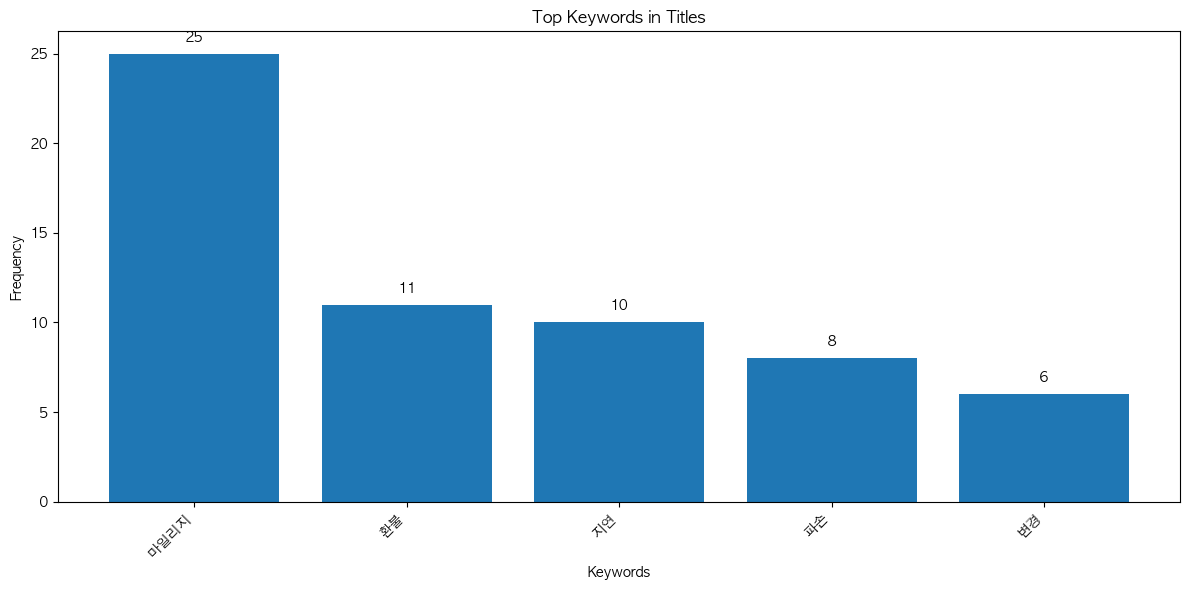

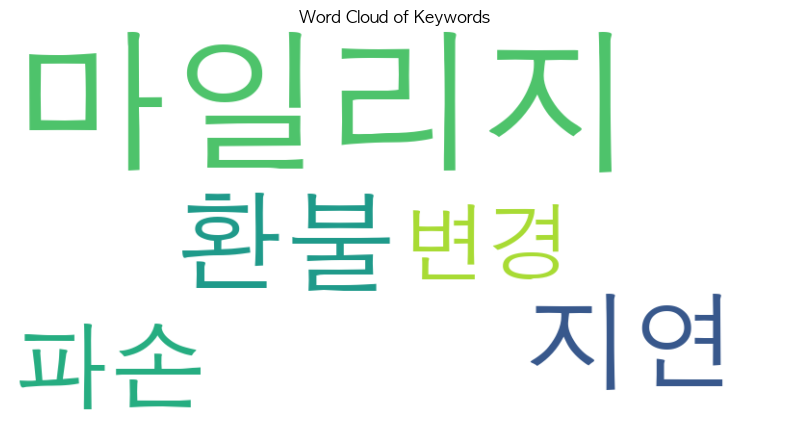

In [9]:
import json
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib import rc
from wordcloud import WordCloud

# 한글 폰트 경로 설정
font_path = '/System/Library/Fonts/Supplemental/AppleGothic.ttf'  # 사용자 환경에 맞게 경로 수정
rc('font', family='AppleGothic')  # Mac

# JSON 파일 불러오기
with open('6-11월 4개 항공사.json', 'r', encoding='utf-8') as json_file:
    data = json.load(json_file)

# 모든 title에서 특정 키워드 포함 여부 체크 및 추출
keywords = ['환불', '파손', '마일리지', '지연', '변경']  # 분석할 키워드 설정
all_words = []
for item in data:
    title = item.get('title', '').strip()
    # 키워드가 포함된 경우 해당 키워드만 추출
    for keyword in keywords:
        if keyword in title:
            all_words.append(keyword)

# 단어 빈도수 계산
word_counts = Counter(all_words)

# 상위 20개 단어 추출
top_words = word_counts.most_common(20)

if top_words:  # 데이터가 존재할 경우
    # 단어와 빈도로 분리
    words, counts = zip(*top_words)

    # 막대 그래프 시각화
    plt.figure(figsize=(12, 6))
    plt.bar(words, counts)
    plt.xticks(rotation=45, ha='right')
    plt.title('Top Keywords in Titles')
    plt.ylabel('Frequency')
    plt.xlabel('Keywords')

    # 막대 위에 카운트 표시
    for i, count in enumerate(counts):
        plt.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=10)

    plt.tight_layout()
    plt.show()

    # 워드클라우드 시각화
    wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Keywords')
    plt.show()
else:
    print("데이터에서 키워드와 일치하는 항목이 없습니다.")


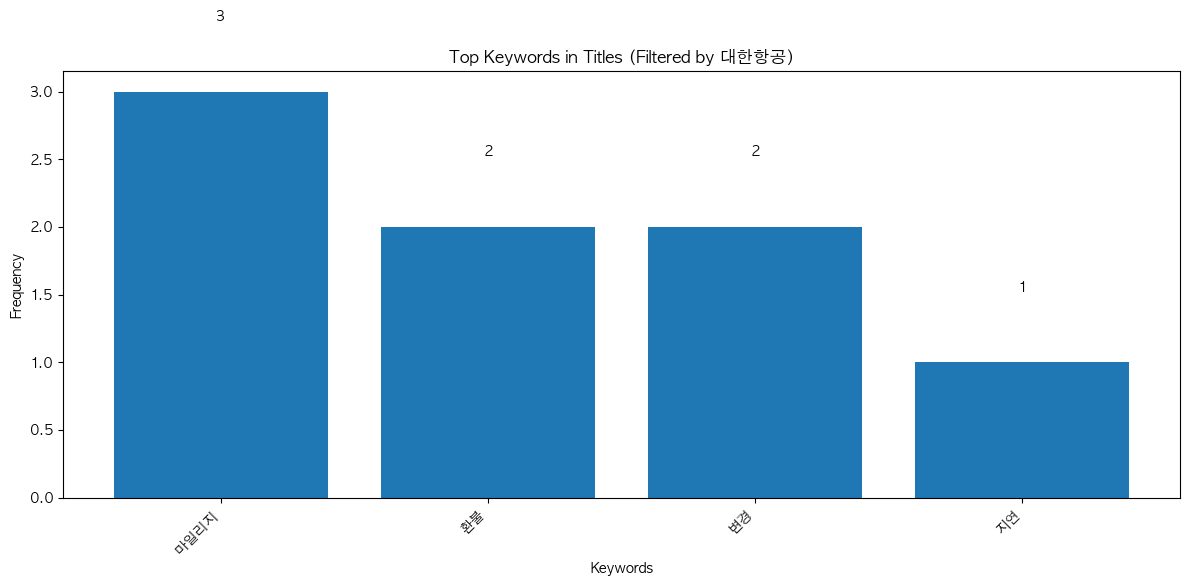

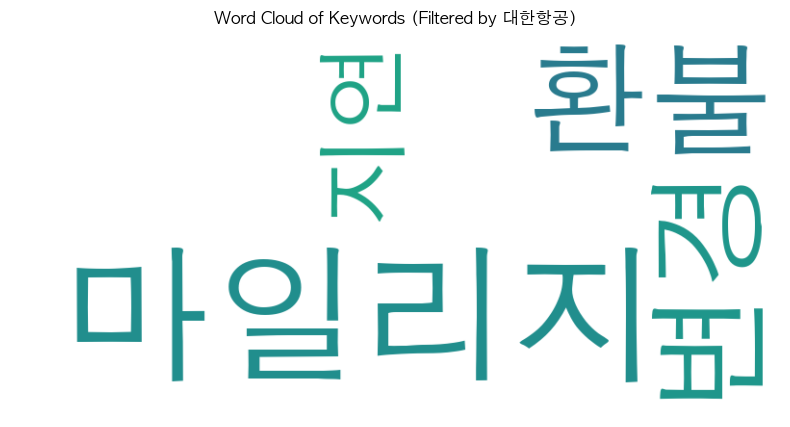

In [12]:
import json
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib import rc
from wordcloud import WordCloud

# 한글 폰트 경로 설정
font_path = '/System/Library/Fonts/Supplemental/AppleGothic.ttf'  # 사용자 환경에 맞게 경로 수정
rc('font', family='AppleGothic')  # Mac

# JSON 파일 불러오기
with open('6-11월 4개 항공사.json', 'r', encoding='utf-8') as json_file:
    data = json.load(json_file)

# 모든 title에서 특정 키워드 포함 여부 체크 및 company 필터 적용
keywords = ['환불', '파손', '마일리지', '지연', '변경']  # 분석할 키워드 설정
all_words = []

for item in data:
    # '대한항공' 필터링
    if item.get('company') == '대한항공':
        title = item.get('title', '').strip()
        # 키워드가 포함된 경우 해당 키워드만 추출
        for keyword in keywords:
            if keyword in title:
                all_words.append(keyword)

# 단어 빈도수 계산
word_counts = Counter(all_words)

# 상위 20개 단어 추출
top_words = word_counts.most_common(20)

if top_words:  # 데이터가 존재할 경우
    # 단어와 빈도로 분리
    words, counts = zip(*top_words)

    # 막대 그래프 시각화
    plt.figure(figsize=(12, 6))
    plt.bar(words, counts)
    plt.xticks(rotation=45, ha='right')
    plt.title('Top Keywords in Titles (Filtered by 대한항공)')
    plt.ylabel('Frequency')
    plt.xlabel('Keywords')

    # 막대 위에 카운트 표시
    for i, count in enumerate(counts):
        plt.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=10)

    plt.tight_layout()
    plt.show()

    # 워드클라우드 시각화
    wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Keywords (Filtered by 대한항공)')
    plt.show()
else:
    print("데이터에서 키워드와 일치하는 항목이 없습니다.")


## TEST

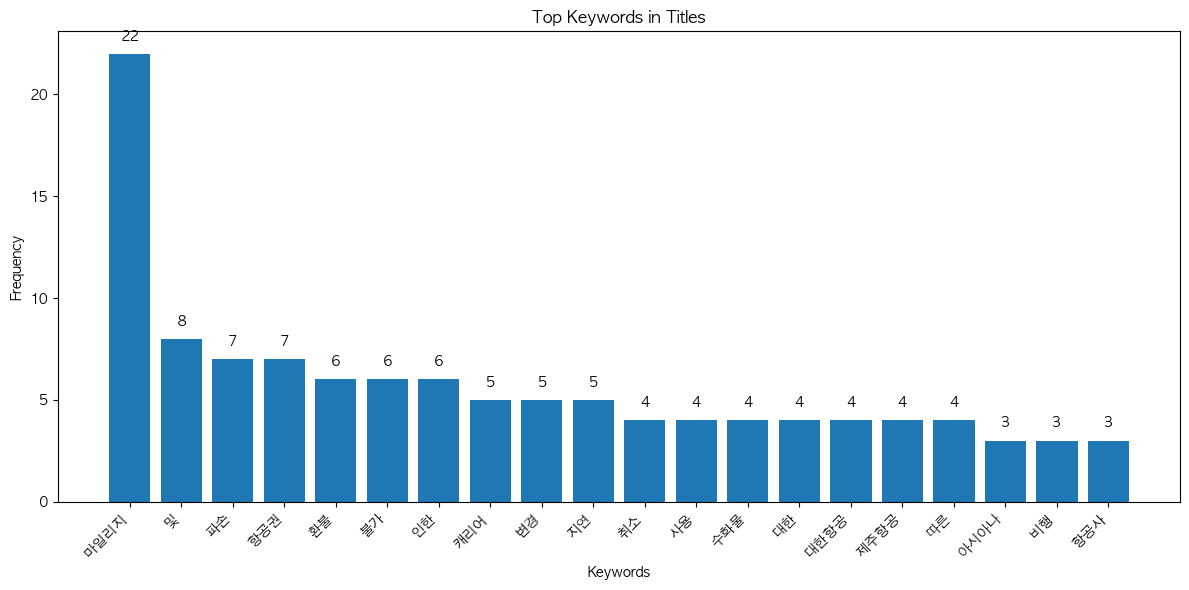

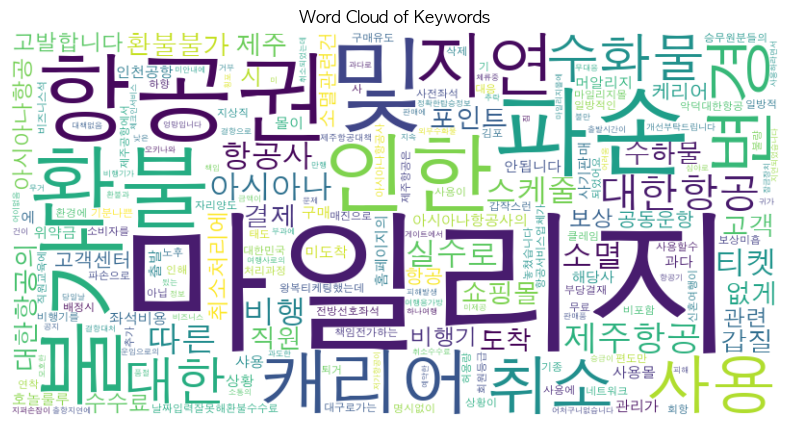

In [11]:
import json
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib import rc
from wordcloud import WordCloud
import re

# 한글 폰트 경로 설정
font_path = '/System/Library/Fonts/Supplemental/AppleGothic.ttf'  # 사용자 환경에 맞게 경로 수정
rc('font', family='AppleGothic')  # Mac

# JSON 파일 불러오기
with open('6-11월 4개 항공사.json', 'r', encoding='utf-8') as json_file:
    data = json.load(json_file)

# 모든 title에서 한글 단어 추출 (정확한 단어 매칭)
all_words = []
for item in data:
    title = item.get('title', '').strip()
    # 한글 단어만 추출
    words = re.findall(r'\b[가-힣]+\b', title)
    all_words.extend(words)

# 단어 빈도수 계산
word_counts = Counter(all_words)

# 상위 20개 단어 추출
top_words = word_counts.most_common(20)

if top_words:  # 데이터가 존재할 경우
    # 단어와 빈도로 분리
    words, counts = zip(*top_words)

    # 막대 그래프 시각화
    plt.figure(figsize=(12, 6))
    plt.bar(words, counts)
    plt.xticks(rotation=45, ha='right')
    plt.title('Top Keywords in Titles')
    plt.ylabel('Frequency')
    plt.xlabel('Keywords')

    # 막대 위에 카운트 표시
    for i, count in enumerate(counts):
        plt.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=10)

    plt.tight_layout()
    plt.show()

    # 워드클라우드 시각화
    wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Keywords')
    plt.show()
else:
    print("데이터에서 키워드와 일치하는 항목이 없습니다.")


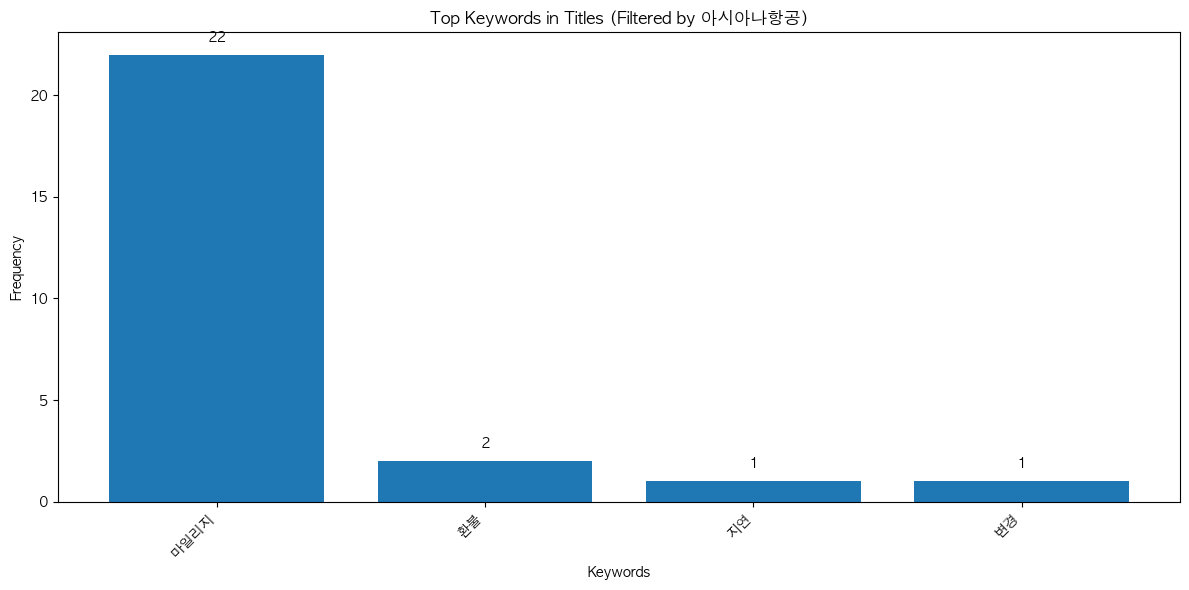

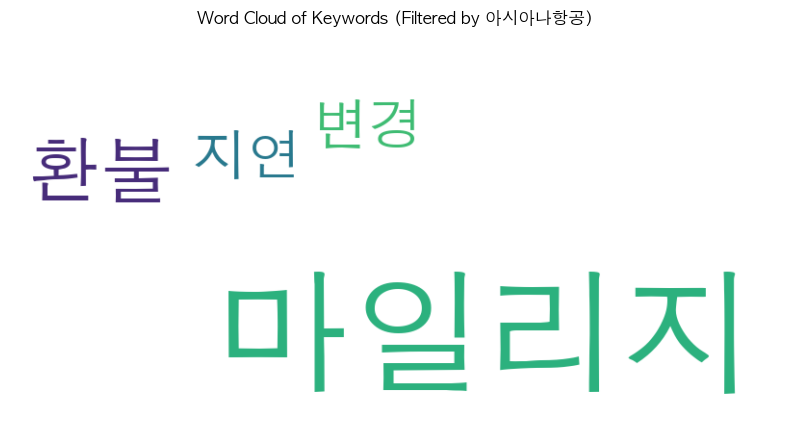

In [5]:
import json
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib import rc
from wordcloud import WordCloud

# 한글 폰트 경로 설정
font_path = '/System/Library/Fonts/Supplemental/AppleGothic.ttf'  # 사용자 환경에 맞게 경로 수정
rc('font', family='AppleGothic')  # Mac

# JSON 파일 불러오기
with open('6-11월 4개 항공사.json', 'r', encoding='utf-8') as json_file:
    data = json.load(json_file)

# 모든 title에서 특정 키워드 포함 여부 체크 및 company 필터 적용
keywords = ['환불', '파손', '마일리지', '지연', '변경']  # 분석할 키워드 설정
all_words = []

for item in data:
    # '대한항공' 필터링
    if item.get('company') == '아시아나항공':
        title = item.get('title', '').strip()
        # 키워드가 포함된 경우 해당 키워드만 추출
        for keyword in keywords:
            if keyword in title:
                all_words.append(keyword)

# 단어 빈도수 계산
word_counts = Counter(all_words)

# 상위 20개 단어 추출
top_words = word_counts.most_common(20)

if top_words:  # 데이터가 존재할 경우
    # 단어와 빈도로 분리
    words, counts = zip(*top_words)

    # 막대 그래프 시각화
    plt.figure(figsize=(12, 6))
    plt.bar(words, counts)
    plt.xticks(rotation=45, ha='right')
    plt.title('Top Keywords in Titles (Filtered by 아시아나항공)')
    plt.ylabel('Frequency')
    plt.xlabel('Keywords')

    # 막대 위에 카운트 표시
    for i, count in enumerate(counts):
        plt.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=10)

    plt.tight_layout()
    plt.show()

    # 워드클라우드 시각화
    wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Keywords (Filtered by 아시아나항공)')
    plt.show()
else:
    print("데이터에서 키워드와 일치하는 항목이 없습니다.")
